## Exploración de datos

Realice un análisis exploratorio que permita describir estadística y visualmente el comportamiento de las variables a considerar. Calcule estadísticas descriptivas, realice histogramas, diagramas de caja, diagramas de dispersión, diagramas de violín y otros que permitan comprender cómo se comportan las variables. Documente el análisis realizado.


In [141]:
import pandas as pd

#Cargar los datos
file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding="latin1",sep=';')
#Se usa Latin1 debido a que hay algunos caracteres que no identifican


print(df.head())


           id                category  \
0  5668626895  housing/rent/apartment   
1  5664597177  housing/rent/apartment   
2  5668626833  housing/rent/apartment   
3  5659918074  housing/rent/apartment   
4  5668626759  housing/rent/apartment   

                                               title  \
0  Studio apartment 2nd St NE, Uhland Terrace NE,...   
1                  Studio apartment 814 Schutte Road   
2  Studio apartment N Scott St, 14th St N, Arling...   
3                     Studio apartment 1717 12th Ave   
4  Studio apartment Washington Blvd, N Cleveland ...   

                                                body amenities  bathrooms  \
0  This unit is located at second St NE, Uhland T...       NaN        NaN   
1  This unit is located at 814 Schutte Road, Evan...       NaN        NaN   
2  This unit is located at N Scott St, 14th St N,...       NaN        1.0   
3  This unit is located at 1717 12th Ave, Seattle...       NaN        1.0   
4  This unit is located at Wash

In [142]:
#Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [143]:
#Cuantas respuestas distintas hay por columna
df.nunique()

id               10000
category             3
title             9350
body              9961
amenities         2254
bathrooms           14
bedrooms            10
currency             1
fee                  1
has_photo            3
pets_allowed         3
price             1725
price_display     1726
price_type           3
square_feet       1738
address           6658
cityname          1574
state               51
latitude          2395
longitude         2392
source              12
time              6310
dtype: int64

In [144]:
df['category'].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term'], dtype=object)

In [145]:
df['has_photo'].unique()

array(['Thumbnail', 'Yes', 'No'], dtype=object)

In [146]:
df["pets_allowed"].unique()

array([nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

In [147]:
df['price_type'].unique()

array(['Monthly', 'Weekly', 'Monthly|Weekly'], dtype=object)

In [148]:
df['source'].unique()

array(['RentLingo', 'Listanza', 'ListedBuy', 'RentDigs.com', 'GoSection8',
       'RealRentals', 'RENTOCULAR', 'rentbits', 'Home Rentals',
       'Real Estate Agent', 'RENTCafé', 'tenantcloud'], dtype=object)

In [149]:
df['bathrooms'].unique()

array([nan, 1. , 1.5, 2. , 2.5, 3. , 4. , 3.5, 4.5, 5. , 7. , 5.5, 6. ,
       8. , 8.5])

In [150]:
df.describe()

id    bathrooms     bedrooms         price   square_feet  \
count  1.000000e+04  9966.000000  9993.000000  10000.000000  10000.000000   
mean   5.623396e+09     1.380544     1.744021   1486.277500    945.810500   
std    7.021025e+07     0.615410     0.942354   1076.507968    655.755736   
min    5.508654e+09     1.000000     0.000000    200.000000    101.000000   
25%    5.509248e+09     1.000000     1.000000    949.000000    649.000000   
50%    5.668610e+09     1.000000     2.000000   1270.000000    802.000000   
75%    5.668626e+09     2.000000     2.000000   1695.000000   1100.000000   
max    5.668663e+09     8.500000     9.000000  52500.000000  40000.000000   

          latitude    longitude          time  
count  9990.000000  9990.000000  1.000000e+04  
mean     37.695162   -94.652247  1.574891e+09  
std       5.495851    15.759805  3.762395e+06  
min      21.315500  -158.022100  1.568744e+09  
25%      33.679850  -101.301700  1.568781e+09  
50%      38.809800   -93.651600  1.577358e+09  
75%      41.349800   -82.209975  1.577359e+09  
max      61.594000   -70.191600  1.577362e+09

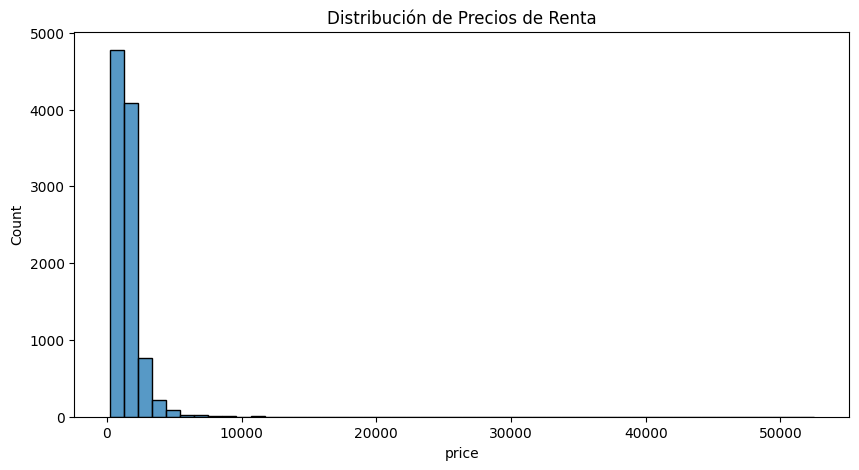

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

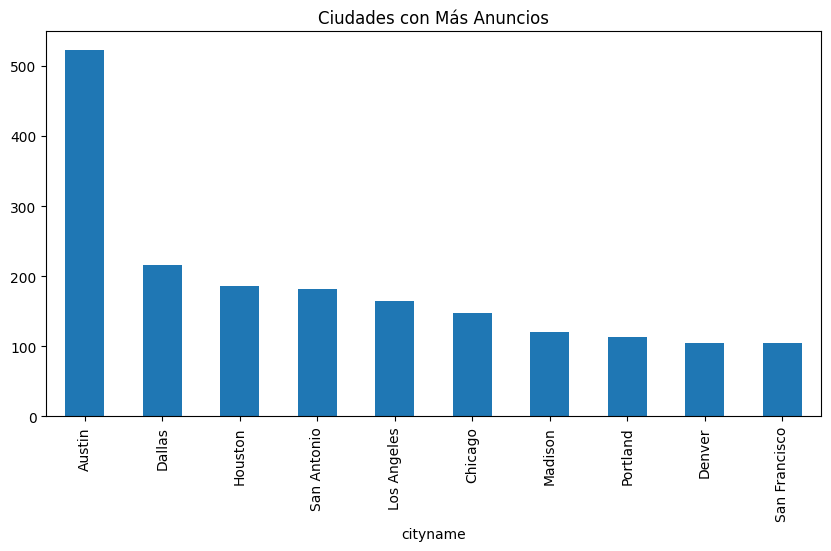

In [152]:
#Se grafica mediante un histograma las 10 ciudades con más anuncios
plt.figure(figsize=(10,5))
df["cityname"].value_counts().head(10).plot(kind="bar")
plt.title("Ciudades con Más Anuncios")
plt.show()

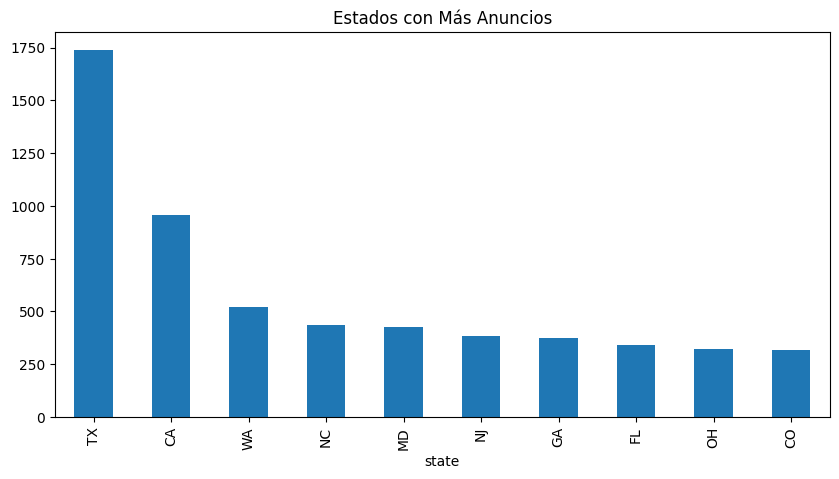

In [153]:
#Se grafican los 10 estados con más anuncios
plt.figure(figsize=(10,5))
df["state"].value_counts().head(10).plot(kind="bar")
plt.title("Estados con Más Anuncios")
plt.show()

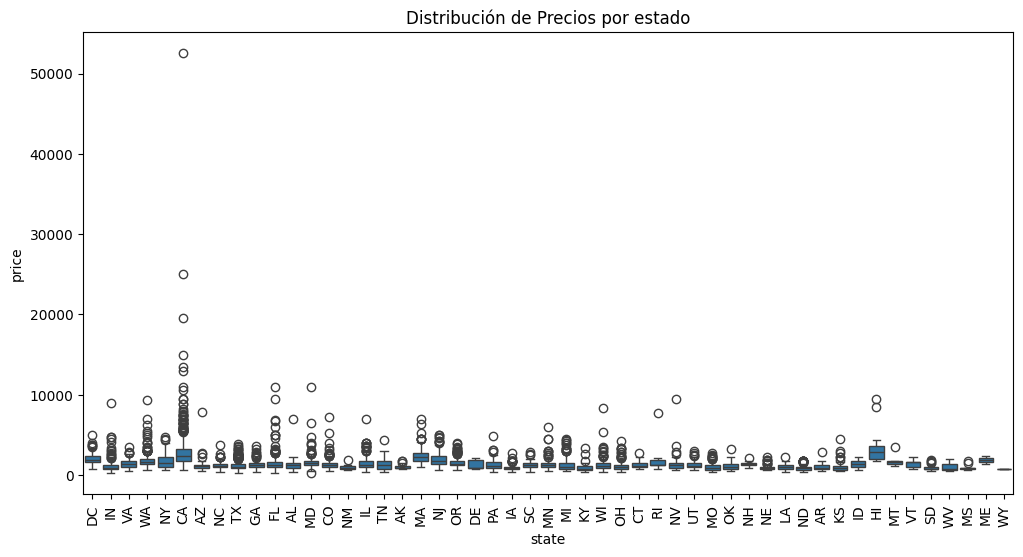

In [154]:
#Boxplot de precios por estado para identificar posibles outliers
plt.figure(figsize=(12,6))
sns.boxplot(x="state", y="price", data=df)
plt.xticks(rotation=90)
plt.title("Distribución de Precios por estado")
plt.show()

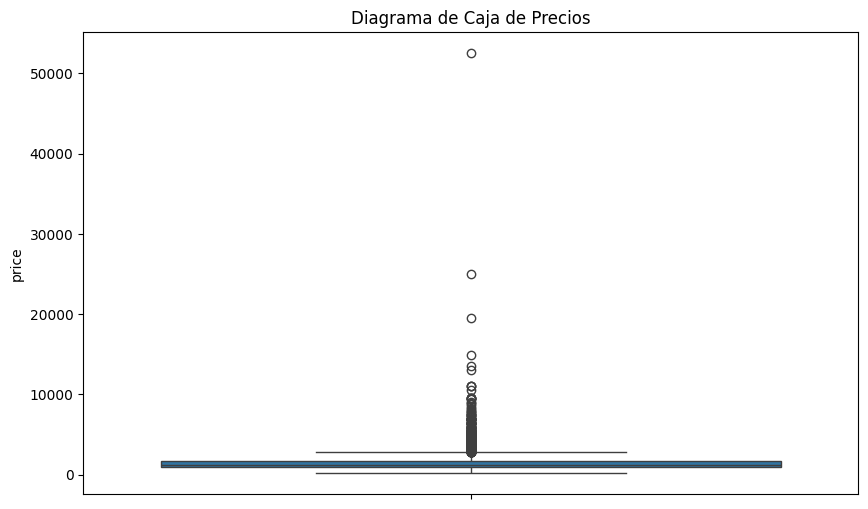

In [155]:
#Boxplot general
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['price'])
plt.title('Diagrama de Caja de Precios')
plt.show()


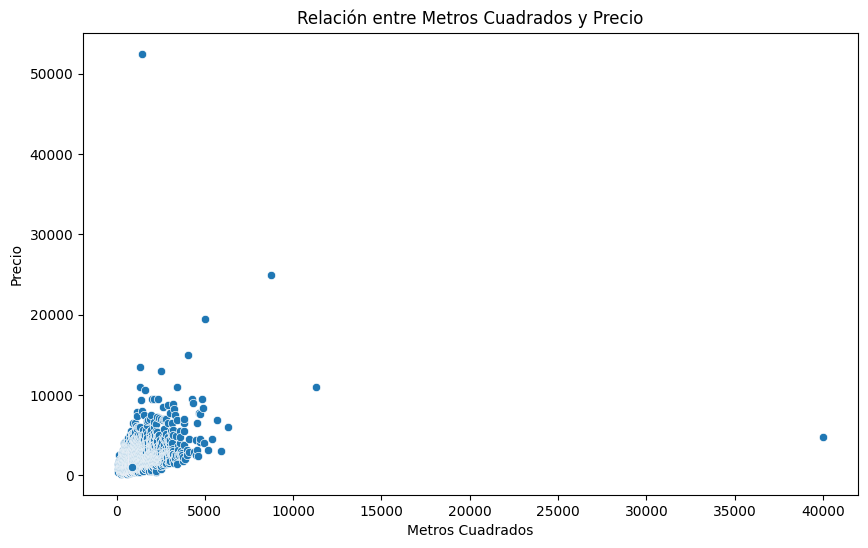

In [156]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['square_feet'], y=df['price'])
plt.title('Relación entre Metros Cuadrados y Precio')
plt.xlabel('Metros Cuadrados')
plt.ylabel('Precio')
plt.show()

In [157]:
columnas = df.columns.tolist()
for i in columnas:
    print(i,df[i].isnull().sum())

id 0
category 0
title 0
body 0
amenities 3549
bathrooms 34
bedrooms 7
currency 0
fee 0
has_photo 0
pets_allowed 4163
price 0
price_display 0
price_type 0
square_feet 0
address 3327
cityname 77
state 77
latitude 10
longitude 10
source 0
time 0


In [158]:
import folium
from folium.plugins import HeatMap

df_mapa = df.dropna(subset=['latitude', 'longitude'])
map_center = [df_mapa["latitude"].mean(), df_mapa["longitude"].mean()]

#Crear el mapa
m = folium.Map(location=map_center, zoom_start=12)

#Agregar cada punto al mapa
for _, row in df_mapa.iterrows():
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=3,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.5
    ).add_to(m)

m


In [159]:
import folium
from folium.plugins import HeatMap

#Filtrar los valores nulos
df_mapa = df.dropna(subset=['latitude', 'longitude'])

map_center = [df_mapa["latitude"].mean(), df_mapa["longitude"].mean()]

#Crear el mapa base
m = folium.Map(location=map_center, zoom_start=12)


heat_data = df_mapa[['latitude', 'longitude']].values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

m


In [160]:
#convertir la variable precio a su valor mensual para los valores semanales


for tipo in df['price_type'].unique():
    count = (df['price_type'] == tipo).sum()
    print(f"{tipo}: {count}")

Monthly: 9998
Weekly: 1
Monthly|Weekly: 1


In [161]:
df['category'].unique()

for tipo in df['category'].unique():
    count = (df['category'] == tipo).sum()
    print(f"{tipo}: {count}")

housing/rent/apartment: 9996
housing/rent/home: 2
housing/rent/short_term: 2


In [162]:
df['bathrooms'].unique()

for tipo in df['bathrooms'].unique():
    count = (df['bathrooms'] == tipo).sum()
    print(f"{tipo}: {count}")

nan: 0
1.0: 6639
1.5: 282
2.0: 2418
2.5: 315
3.0: 174
4.0: 46
3.5: 66
4.5: 12
5.0: 8
7.0: 2
5.5: 1
6.0: 1
8.0: 1
8.5: 1


In [163]:
df['pets_allowed'].unique()

for tipo in df['pets_allowed'].unique():
    count = (df['pets_allowed'] == tipo).sum()
    print(f"{tipo}: {count}")

nan: 0
Cats,Dogs: 5228
Cats: 485
Dogs: 124


In [164]:
df['pets_allowed'].unique()


array([nan, 'Cats,Dogs', 'Cats', 'Dogs'], dtype=object)

Vamos a eliminar los datos que tienen en su segunda columna "housing/rent/home" o "housing/rent/short_term" ya que son solo 4 entradas.

In [165]:
#Filtrar solo las filas que sean 'housing/rent/apartment'
df = df[df['category'] == 'housing/rent/apartment']

#Reiniciar los índices
df.reset_index(drop=True, inplace=True)

print(df['category'].unique())
print(df.shape)  #Ver el nuevo tamaño del DataFrame

['housing/rent/apartment']
(9996, 22)


Ahora modificaremos el tipo de precio para que todos sean mensual, para eso convertiremos el semanal a mensual y eliminaremos el "Monthly|Weekly" ya que es ambiguo.

In [166]:
#convertir precios semanales a mensuales
df.loc[df['price_type'] == 'Weekly', 'price'] *= 4.33
df.loc[df['price_type'] == 'Weekly', 'price_type'] = 'Monthly'

#eliminar la fila con 'Monthly|Weekly'
df = df[df['price_type'] != 'Monthly|Weekly']


df.reset_index(drop=True, inplace=True)
print(df['price_type'].unique())
print(df.shape)

['Monthly']
(9995, 22)


C:\Users\JESUS\AppData\Local\Temp\ipykernel_23744\1936949159.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[6754.8]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['price_type'] == 'Weekly', 'price'] *= 4.33


Ahora convertiremos la columna Amenities en una serie de diferentes columnas binarias que representarán con 0 si no cuentan con el servició o 1 de lo contrario.

In [167]:
#Rellenar valores faltantes con ''
df['amenities'] = df['amenities'].fillna('')

#Dividir los datos en una lista
df['amenities_list'] = df['amenities'].apply(lambda x: x.split(','))

#Creación de variable número de amenities
df['num_amenities'] = df['amenities_list'].apply(lambda x: len([amenity.strip() for amenity in x if amenity]))

#Crear variable binaria que indica si tiene amenities o no
df['tiene_amenities'] = df['num_amenities'].apply(lambda x: 1 if x > 0 else 0)

#Obtener todas las amenities únicas
unique_amenities = set(amenity.strip() for lista in df['amenities_list'] for amenity in lista if amenity)

print(f"Número total de amenities: ", len(unique_amenities))

print(list(unique_amenities))

Número total de amenities:  27
['Washer Dryer', 'Doorman', 'Gym', 'AC', 'Playground', 'Clubhouse', 'Cable or Satellite', 'Internet Access', 'Alarm', 'Elevator', 'Parking', 'Storage', 'Gated', 'Golf', 'Wood Floors', 'Basketball', 'Pool', 'View', 'Refrigerator', 'Luxury', 'Tennis', 'Fireplace', 'Garbage Disposal', 'TV', 'Hot Tub', 'Dishwasher', 'Patio/Deck']


In [168]:
#Crear columnas binarias para cada amenity
for amenity in unique_amenities:
    df[amenity] = df['amenities_list'].apply(lambda x: 1 if amenity in x else 0)

#Eliminar columnas originales que ya no necesitamos
df.drop(columns=['amenities_list'], inplace=True)

print(f"Se generaron {len(unique_amenities)} nuevas columnas.")

Se generaron 27 nuevas columnas.


Ahora eliminaremos los datos en los cuales no se tiene conocimiento del número de baños, los cuales son 32 datos.

In [169]:
df = df.dropna(subset=['bathrooms'])

In [170]:
#Reiniciar índices
df.reset_index(drop=True, inplace=True)

In [171]:
#Rellenar valores faltantes con ''
df['pets_allowed'] = df['pets_allowed'].fillna('')

#Dividir los datos en una lista
df['pets_list'] = df['pets_allowed'].apply(lambda x: x.split(','))

#Obtener todas las amenities únicas
unique_pets = set(amenity.strip() for lista in df['pets_list'] for amenity in lista if amenity)

print(f"Número total de amenities: ", len(unique_pets))

print(list(unique_pets))

Número total de amenities:  2
['Dogs', 'Cats']


In [172]:
#Crear columnas binarias para cada mascota
for mascota in unique_pets:
    df[mascota] = df['pets_list'].apply(lambda x: 1 if mascota in x else 0)

#Eliminar columnas originales que ya no necesitamos
df.drop(columns=['pets_list'], inplace=True)


print(f"Se generaron {len(unique_pets)} nuevas columnas.")

Se generaron 2 nuevas columnas.


Ahora eliminaremos los datos que no tengan coordenadas, que a la vez, tampoco presentarán ciudad ni estado.

In [173]:
#Eliminar filas donde latitude o longitude sean NaN
df = df.dropna(subset=['latitude', 'longitude'])

#Reiniciar índices
df.reset_index(drop=True, inplace=True)

Creamos una variable nueva de precio x pie cuadrado

In [174]:
# Crear la nueva variable 'price_ft'
df['price/ft'] = df['price'] / df['square_feet']

Ahora veremos el efecto de Source sobre el precio.

Número de registros por fuente:
source
RentLingo            6872
RentDigs.com         2764
ListedBuy             174
RealRentals            69
GoSection8             31
Listanza               21
RENTOCULAR             16
rentbits                2
Home Rentals            1
Real Estate Agent       1
RENTCafé                1
tenantcloud             1
Name: count, dtype: int64

Estadísticas de precio por fuente:
                         price                     price/ft                
                          mean          std count      mean       std count
source                                                                     
GoSection8         1245.935484   701.673188    31  1.447597  0.762907    31
Home Rentals        975.000000          NaN     1  1.392857       NaN     1
Listanza           2150.904762   831.303308    21  2.642712  3.819826    21
ListedBuy          1300.280460  1037.992664   174  1.454871  2.521460   174
RENTCafé            995.000000          NaN     1  1.13

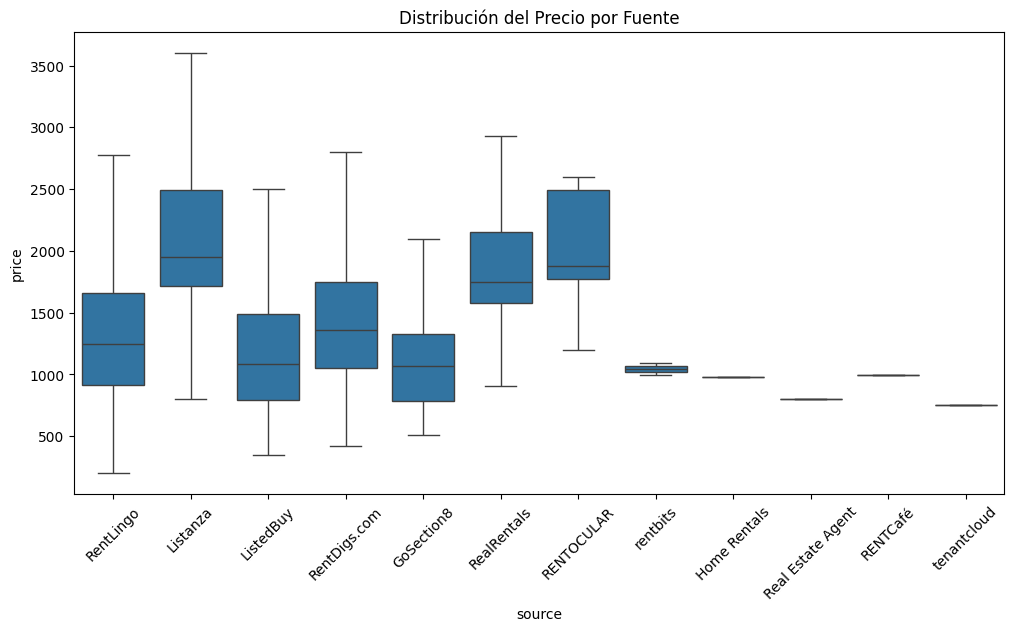

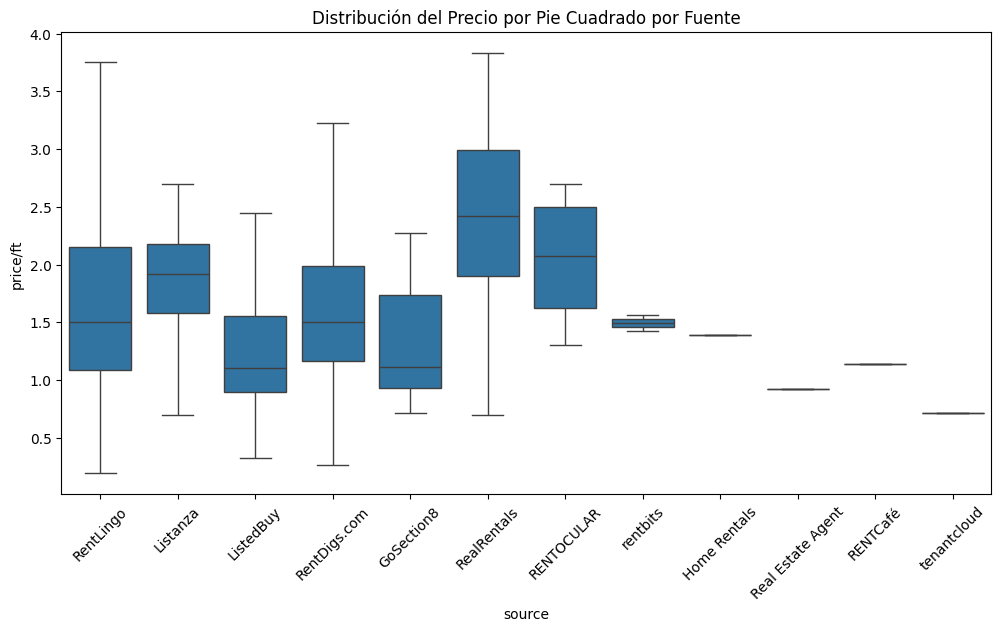

In [175]:
print("Número de registros por fuente:")
print(df['source'].value_counts())

#Calcular estadísticas descriptivas
price_stats = df.groupby('source')[['price', 'price/ft']].agg(['mean', 'std', 'count'])
print("\nEstadísticas de precio por fuente:")
print(price_stats)

#Visualizar la distribución de precios por fuente
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='source', y='price', showfliers=False)
plt.xticks(rotation=45)
plt.title("Distribución del Precio por Fuente")
plt.show()

#Visualizar la distribución de precio por pie cuadrado por fuente
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='source', y='price/ft', showfliers=False)
plt.xticks(rotation=45)
plt.title("Distribución del Precio por Pie Cuadrado por Fuente")
plt.show()


Posteriormente, haremos un anova y una prueba de Kruskal para comprobar que la fuente no implica diferencias estadísticas significativas.

In [ ]:
import scipy.stats as stats

#Obtener las listas de `price/ft` por fuente
grouped_data = [df[df['source'] == src]['price/ft'].dropna() for src in df['source'].unique()]

#Aplicar anova
anova_result = stats.f_oneway(*grouped_data)

#Aplicar la prueba de Kruskal-Wallis
kruskal_result = stats.kruskal(*grouped_data)

print(f"ANOVA: F={anova_result.statistic:.4f}, p-value={anova_result.pvalue:.4f}")
print(f"Kruskal-Wallis: H={kruskal_result.statistic:.4f}, p-value={kruskal_result.pvalue:.4f}")


ANOVA: F=5.8984, p-value=0.0000
Kruskal-Wallis: H=130.2819, p-value=0.0000


Como la hipótesis nula de que las fuentes no afectan el precio se rechaza, sabemos que cada fuente puede tener influencia en el costo, por lo que se usará como variable. De igual forma, se eliminarán aquellos datos correspondientes a fuentes con menos de 10 apariciones.

In [177]:
#Eliminar fuentes con menos de 10 registros
df = df[df['source'].map(df['source'].value_counts()) > 10]
df.reset_index(drop=True, inplace=True)
